## Movie Genre Data Analysis

In [7]:
import pandas as pd

movies = pd.read_csv(r'C:\Users\trist\Documents\Python Tutorial\File_Sorter\CSV Files\imdb_movies.csv')

In [9]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)

In [11]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
movies.drop_duplicates(inplace = True)

In [14]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [17]:
movies.dropna(subset = (['genres']), inplace = True)

In [18]:
movies['profit'] = movies['revenue'] - movies['budget']

In [19]:
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','popularity','vote_count','vote_average','profit']]

In [20]:
from pandas import Series, DataFrame

movies_genre['genres'].str.split('|').apply(Series,1).stack()

C:\Users\trist\AppData\Local\Temp\ipykernel_25392\4269339884.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  movies_genre['genres'].str.split('|').apply(Series,1).stack()


0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [22]:
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\trist\AppData\Local\Temp\ipykernel_25392\1831005858.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


In [24]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,popularity,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,28.419936,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,0.065141,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,0.065141,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,0.064317,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,0.064317,22,5.4,0,Comedy


In [26]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title',ascending = True)

<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

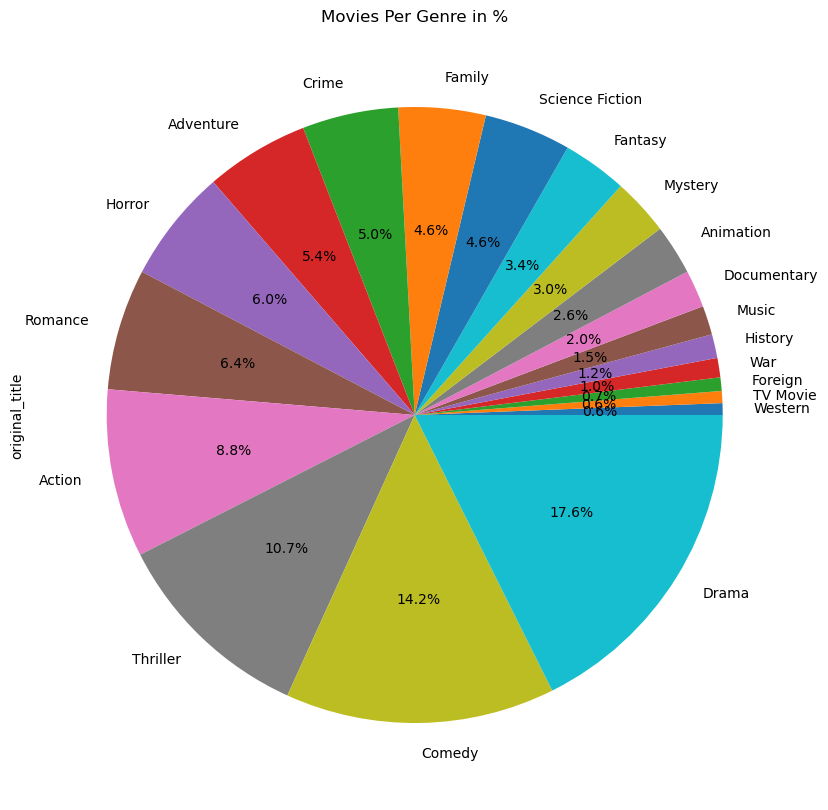

In [27]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

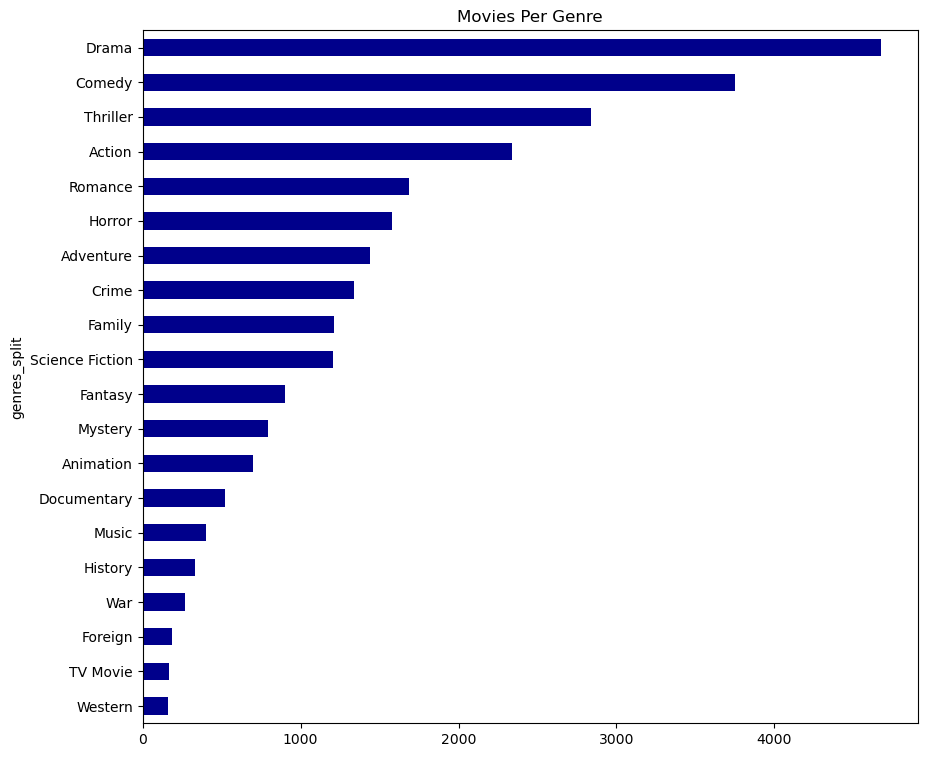

In [28]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre', color = 'DarkBlue',figsize = (10,9))

In [29]:
numeric_cols = movies_genre.select_dtypes(include='number').columns

In [31]:
genres_avg = movies_genre.groupby('genres_split')[numeric_cols].mean()
pd.options.display.float_format = '{:2f}'.format

In [32]:
genres_avg.sort_values('budget', ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue bt Genre'}, ylabel='genres_split'>

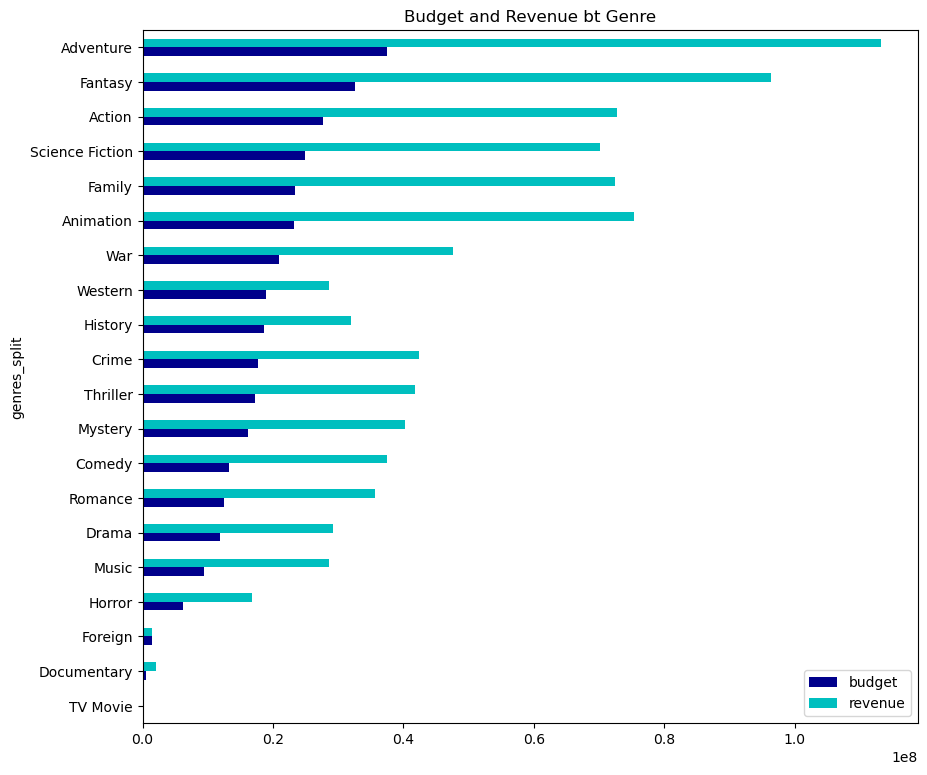

In [33]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue bt Genre', color = ('DarkBlue', 'c'),figsize = (10,9))

In [34]:
genres_avg

,popularity,popularity,budget,revenue,runtime,popularity,popularity,vote_count,vote_average,profit
genres_split,,,,,,,,,,
TV Movie,0.270896,0.270896,267664.670659,251497.005988,91.982036,0.270896,0.270896,34.365269,5.788024,-16167.664671
Documentary,0.181432,0.181432,577149.148077,2041106.994231,102.651923,0.181432,0.181432,35.105769,6.908462,1463957.846154
Foreign,0.191496,0.191496,1451434.925532,1520459.835106,107.228723,0.191496,0.191496,16.627660,5.981383,69024.909574
Horror,0.465357,0.465357,6226529.210751,16822808.624313,94.424557,0.465357,0.465357,120.059866,5.337447,10596279.413561
Music,0.487321,0.487321,9438627.549020,28571768.691176,105.137255,0.487321,0.487321,124.340686,6.480392,19133141.142157
Drama,0.591495,0.591495,11880717.773529,29232255.725840,110.478151,0.591495,0.591495,182.544538,6.165546,17351537.952311
Romance,0.592082,0.592082,12531271.847547,35691972.327103,106.891355,0.592082,0.592082,166.070678,6.042874,23160700.479556
Comedy,0.592607,0.592607,13297915.618244,37526242.072238,96.745057,0.592607,0.592607,176.436330,5.905167,24228326.453994
Mystery,0.690012,0.690012,16119270.062963,40217566.661728,105.928395,0.690012,0.690012,236.998765,5.946790,24098296.598765


<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

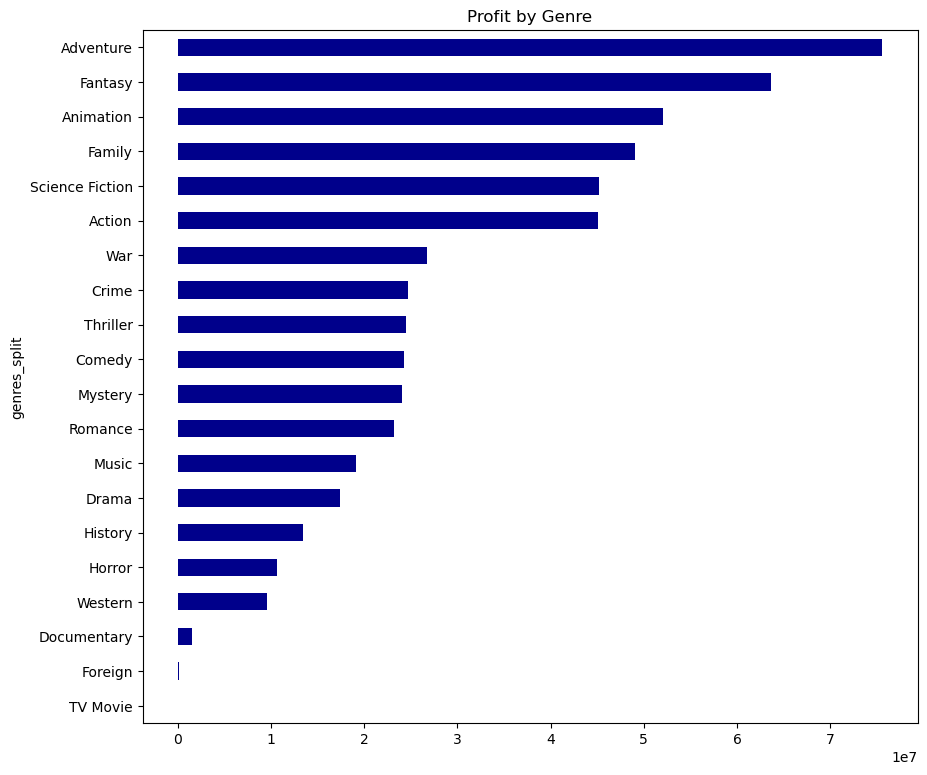

In [36]:
genres_avg.sort_values('profit', ascending = True, inplace = True)
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = ('DarkBlue'),figsize = (10,9))

In [38]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,popularity,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,28.419936,6185,7.100000,228436354,Action


In [39]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [41]:
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average',ascending = True)

In [42]:
genres_vote

,vote_average
genres_split,
Family,1
Action,2
Mystery,2
History,2
Fantasy,2
Adventure,2
War,2
Horror,3
Romance,3


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

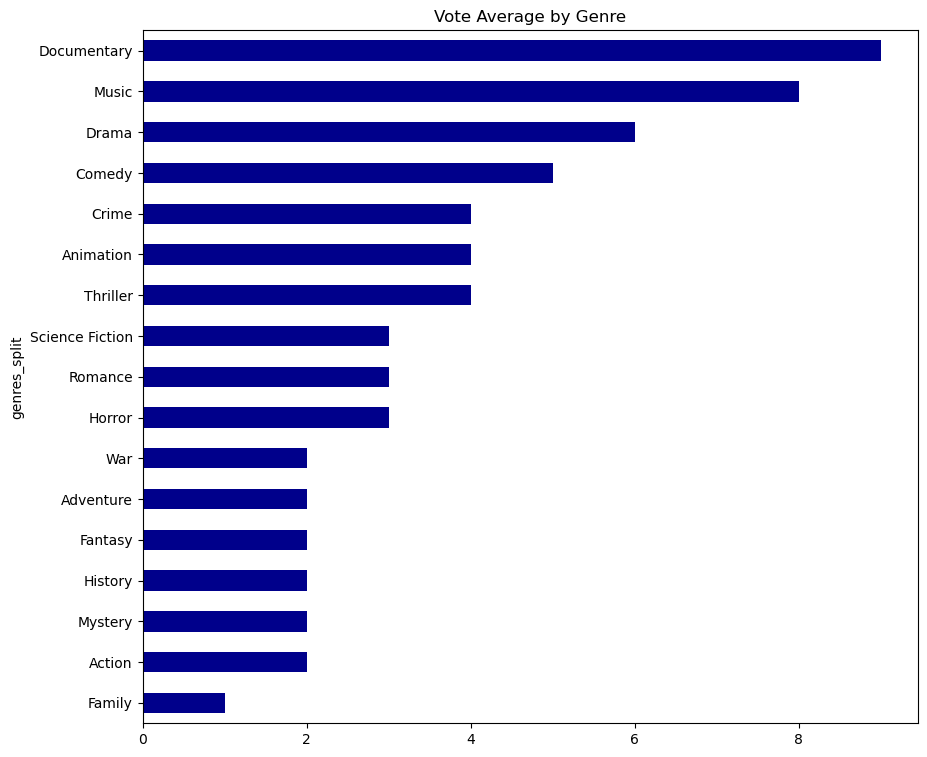

In [43]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', color = ('DarkBlue'),figsize = (10,9))

<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

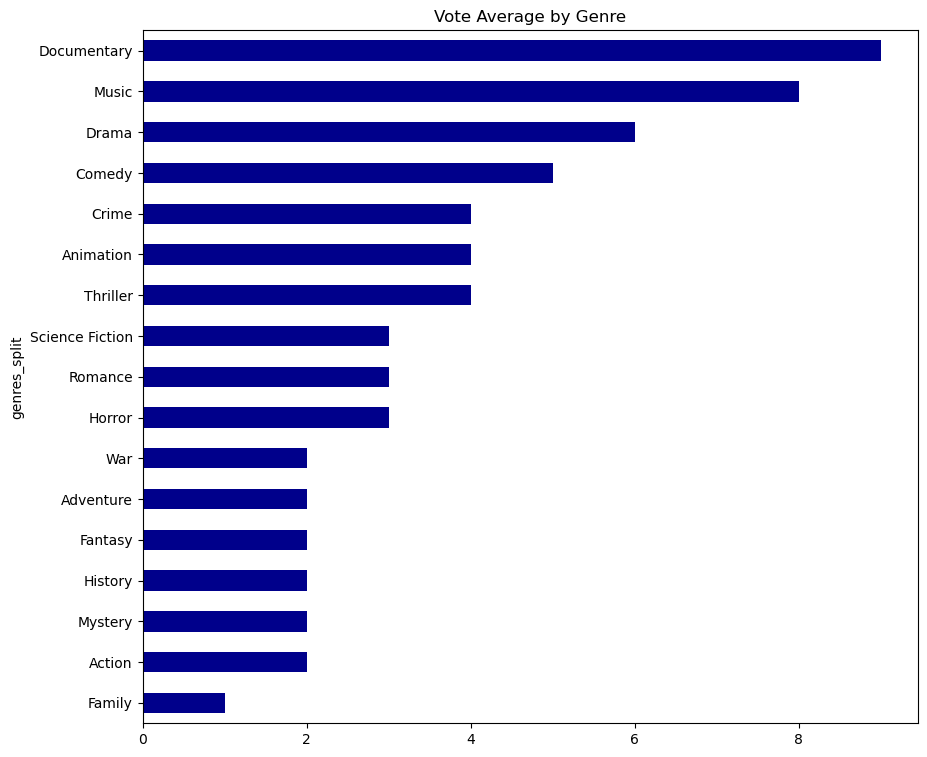

In [44]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', color = ('DarkBlue'),figsize = (10,9))

In [45]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,popularity,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,28.419936,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,0.065141,11,6.500000,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,0.065141,11,6.500000,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,0.064317,22,5.400000,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,0.064317,22,5.400000,0,Comedy


In [46]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

<Axes: xlabel='vote_average', ylabel='revenue'>

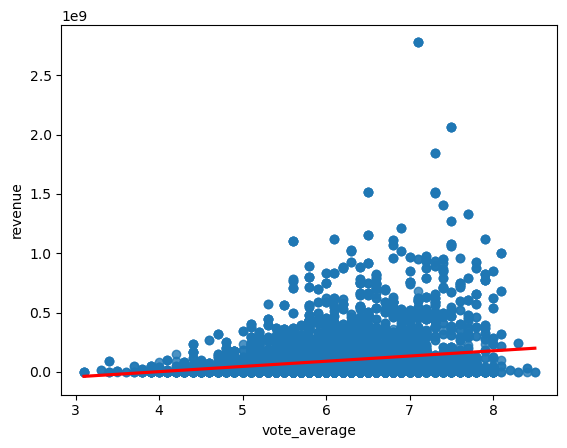

In [47]:
import seaborn as sns

sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})

In [48]:
movies_counted.head()

,popularity,budget,revenue,original_title,runtime,release_date,popularity,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,32.985763,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,28.419936,6185,7.100000,228436354,Action


<Axes: xlabel='budget', ylabel='profit'>

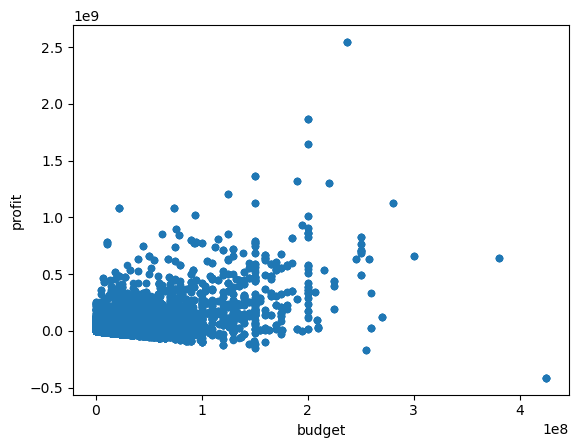

In [49]:
movies_counted.plot.scatter(x = 'budget', y = 'profit')